In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("E:/EBAC/Material")

customer_data_file = 'wine-clustering.csv'
wines = pd.read_csv(customer_data_file)
wines_list = wines.to_numpy()
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# Muestra con la que probaremos el algoritmo KNN
wine_sample = [14,2,2.5,16,115,3,2.5,0.4,2,9,1,3.5,800]
# Definir el número de vecinos
k = 5

In [11]:
# Cargar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

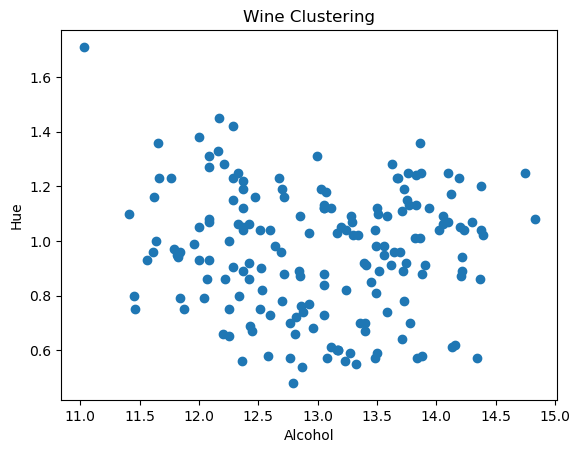

In [12]:
# Diagrama de dispersión
plt.scatter(wines.Alcohol, wines.Hue)
plt.xlabel("Alcohol")
plt.ylabel("Hue")
plt.title("Wine Clustering")
plt.show()

In [13]:
# Ejecucion del algoritmo KNN
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'auto').fit(wines)
distances, indices = knn_model.kneighbors([wine_sample])

print(distances)
print(indices)

[[ 6.1946267  23.08566871 33.06187079 33.17827301 33.37464756]]
[[ 40  20  25  21 141]]


C:\Users\BlewOs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [30]:
print("K vecinos más cercanos:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(f"{rank} es {wines.iloc[index]}")

K vecinos más cercanos:
1 es Alcohol                  13.56
Malic_Acid                1.71
Ash                       2.31
Ash_Alcanity             16.20
Magnesium               117.00
Total_Phenols             3.15
Flavanoids                3.29
Nonflavanoid_Phenols      0.34
Proanthocyanins           2.34
Color_Intensity           6.13
Hue                       0.95
OD280                     3.38
Proline                 795.00
Name: 40, dtype: float64
2 es Alcohol                  14.06
Malic_Acid                1.63
Ash                       2.28
Ash_Alcanity             16.00
Magnesium               126.00
Total_Phenols             3.00
Flavanoids                3.17
Nonflavanoid_Phenols      0.24
Proanthocyanins           2.10
Color_Intensity           5.65
Hue                       1.09
OD280                     3.71
Proline                 780.00
Name: 20, dtype: float64
3 es Alcohol                  13.05
Malic_Acid                2.05
Ash                       3.22
Ash_Alcanity

In [31]:
# Visualizacion como DataFrame

neighbors = [wines.iloc[index] for index in indices[0][:k]]
neighbors_df = pd.DataFrame(neighbors)

print("K vecinos más cercanos:")
neighbors_df


K vecinos más cercanos:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0


In [29]:
neighbors_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,13.392000,2.350000,2.562000,19.160000,111.600000,2.518000,2.410000,0.334000,1.796000,5.092000,0.980000,3.256000,791.000000
std,0.448854,0.889466,0.396447,3.669877,15.757538,0.690268,1.126166,0.094499,0.665943,1.034828,0.170587,0.477525,23.558438
min,12.930000,1.630000,2.280000,16.000000,89.000000,1.400000,0.500000,0.240000,0.640000,3.580000,0.700000,2.470000,770.000000
25%,13.050000,1.710000,2.310000,16.200000,102.000000,2.410000,2.410000,0.250000,1.920000,4.500000,0.950000,3.200000,780.000000
50%,13.360000,2.050000,2.350000,18.600000,117.000000,2.630000,2.680000,0.340000,1.980000,5.600000,1.030000,3.380000,780.000000
75%,13.560000,2.560000,2.650000,20.000000,124.000000,3.000000,3.170000,0.370000,2.100000,5.650000,1.090000,3.520000,795.000000
max,14.060000,3.800000,3.220000,25.000000,126.000000,3.150000,3.290000,0.470000,2.340000,6.130000,1.130000,3.710000,830.000000


# El promedio de alcohol de los 5 vinos mas cercanos es de 13.392% tomando en cuenta sus valores individuales de 13.56, 14.06, 13.05, 12.93, 13.36

---

# Problema 2

In [36]:
my_basket = [['bread', 'butter', 'wine', 'bananas', 'coffee', 'carrots'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['beer', 'chips', 'asparagus', 'salsa', 'milk', 'apples'],
    ['olive oil', 'bread', 'butter', 'tomatoes', 'steak', 'carrots'],
    ['tomatoes', 'onions', 'chips', 'wine', 'ketchup', 'orange juice'],
    ['bread', 'butter', 'beer', 'chips', 'milk'],
    ['butter', 'tomatoes', 'carrots', 'coffee', 'sugar'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['bread', 'butter', 'ketchup', 'coffee', 'chicken wings'],
    ['butter', 'beer', 'chips', 'asparagus', 'apples'],
    ['tomatoes', 'onion', 'beer', 'chips', 'milk', 'coffee']]

In [43]:
# filtrar informacion a una forma binaria
articulos_unicos = list(set(articulo for sublist in my_basket for articulo in sublist))
basket_filtrada = pd.DataFrame([[1 if articulo in row else 0 for articulo in articulos_unicos] for row in my_basket], columns=articulos_unicos)
basket_filtrada

,tomatoes,beer,carrots,orange juice,onions,onion,butter,asparagus,coffee,bananas,...,chips,chicken wings,potatoes,sugar,apples,milk,steak,wine,olive oil,cheese
0,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [57]:
# Aplicación del algoritno "a priori" para localizar los artículos frecuentemente comprados en la base de datos
from mlxtend.frequent_patterns import apriori

In [45]:
# Análisis "a priori" con un soporte mínimo de 3%
articulos_frecuentes = apriori(basket_filtrada, min_support=0.03, 
                               use_colnames = True).sort_values('support', ascending = False).reset_index(drop=True)
articulos_frecuentes['length'] = articulos_frecuentes['itemsets'].apply(lambda x:len(x))
articulos_frecuentes

C:\Users\BlewOs\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.545455,(tomatoes),1
1,0.545455,(butter),1
2,0.454545,(milk),1
3,0.454545,(chips),1
4,0.363636,(beer),1
...,...,...,...
391,0.090909,"(chips, beer, onion)",3
392,0.090909,"(beer, coffee, onion)",3
393,0.090909,"(tomatoes, olive oil, steak)",3
394,0.090909,"(tomatoes, wine, chips)",3


In [46]:
from mlxtend.frequent_patterns import association_rules

In [48]:
association_rules(articulos_frecuentes, metric='confidence', 
                  min_threshold=1).sort_values("confidence", ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beer),(chips),0.363636,0.454545,0.363636,1.0,2.200000,1.0,0.198347,inf,0.857143,0.800000,1.0,0.900000
1,"(tomatoes, chips, onion)","(beer, coffee)",0.090909,0.090909,0.090909,1.0,11.000000,1.0,0.082645,inf,1.000000,1.000000,1.0,1.000000
2,"(tomatoes, coffee, onion)","(chips, beer)",0.090909,0.363636,0.090909,1.0,2.750000,1.0,0.057851,inf,0.700000,0.250000,1.0,0.625000
3,"(chips, beer, coffee)","(tomatoes, onion)",0.090909,0.090909,0.090909,1.0,11.000000,1.0,0.082645,inf,1.000000,1.000000,1.0,1.000000
4,"(beer, coffee, onion)","(tomatoes, chips)",0.090909,0.181818,0.090909,1.0,5.500000,1.0,0.074380,inf,0.900000,0.500000,1.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,"(chips, asparagus, milk)","(apples, salsa, beer)",0.090909,0.090909,0.090909,1.0,11.000000,1.0,0.082645,inf,1.000000,1.000000,1.0,1.000000
2202,"(asparagus, beer, milk)","(chips, salsa, apples)",0.090909,0.090909,0.090909,1.0,11.000000,1.0,0.082645,inf,1.000000,1.000000,1.0,1.000000
2203,"(salsa, asparagus, milk)","(chips, beer, apples)",0.090909,0.181818,0.090909,1.0,5.500000,1.0,0.074380,inf,0.900000,0.500000,1.0,0.750000
2204,"(apples, salsa, asparagus)","(chips, milk, beer)",0.090909,0.272727,0.090909,1.0,3.666667,1.0,0.066116,inf,0.800000,0.333333,1.0,0.666667


In [60]:
association_rules(articulos_frecuentes, metric='confidence', 
                  min_threshold=10).sort_values("lift", ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Obtenemos bastantes resultados en las dos categorias y de forma agrupada

In [56]:
# Agregamos un filtro para relacionar articulos individualmente

reglas = association_rules(articulos_frecuentes, metric='confidence', min_threshold=1)

reglas_filtradas = reglas[reglas['antecedents'].apply(lambda x: len(x) == 1) & 
                       reglas['consequents'].apply(lambda x: len(x) == 1)]

reglas_filtradas = reglas_filtradas.sort_values(["confidence", "lift"], ascending=False).reset_index(drop=True)

reglas_filtradas


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(olive oil),(steak),0.090909,0.090909,0.090909,1.0,11.000000,1.0,0.082645,inf,1.000000,1.000000,1.0,1.000000
1,(steak),(olive oil),0.090909,0.090909,0.090909,1.0,11.000000,1.0,0.082645,inf,1.000000,1.000000,1.0,1.000000
2,(apples),(asparagus),0.181818,0.181818,0.181818,1.0,5.500000,1.0,0.148760,inf,1.000000,1.000000,1.0,1.000000
3,(asparagus),(apples),0.181818,0.181818,0.181818,1.0,5.500000,1.0,0.148760,inf,1.000000,1.000000,1.0,1.000000
4,(cheese),(potatoes),0.181818,0.181818,0.181818,1.0,5.500000,1.0,0.148760,inf,1.000000,1.000000,1.0,1.000000
5,(potatoes),(cheese),0.181818,0.181818,0.181818,1.0,5.500000,1.0,0.148760,inf,1.000000,1.000000,1.0,1.000000
6,(bananas),(wine),0.090909,0.181818,0.090909,1.0,5.500000,1.0,0.074380,inf,0.900000,0.500000,1.0,0.750000
7,(salsa),(asparagus),0.090909,0.181818,0.090909,1.0,5.500000,1.0,0.074380,inf,0.900000,0.500000,1.0,0.750000
8,(chicken wings),(ketchup),0.090909,0.181818,0.090909,1.0,5.500000,1.0,0.074380,inf,0.900000,0.500000,1.0,0.750000
9,(salsa),(apples),0.090909,0.181818,0.090909,1.0,5.500000,1.0,0.074380,inf,0.900000,0.500000,1.0,0.750000


Obtenemos que los articulos comprados juntos con mayor frecuencia son el aceite de oliva y el bistec con una confianza de 100% y lift de 11
Seguido, los articulos comprados juntos habitualmente son las manzánas con el esparrago, queso y papas, el vino si se compran bananas, esparrago si se compra salsa y ketchup si se compran alitas de pollo; con 100% de confianza y lift de 5.5, lo que muestra una correlacion bastante fuerte, existen mas valores con correlacion fuerte pero esto nos da un insight de en donde podemos enfocarnos inicialmente para tomar una mayor ventaja en cuanto a la aplicacion de promociones o acomodo de los articulos en la tienda.